# Bike Sharing Assignment

##  Problem Statement:

### Factors affecting the demand for shared bikes in the American market :
#### Which variables are significant in predicting the demand for shared bikes.
#### How well those variables describe the bike demands 

## Business Goals:
#### Variation of demand with different features and understanding the demand dynamics of a new market

## 1. Importing Libraries: 

##### Supress Warnings

In [651]:
import warnings
warnings.filterwarnings('ignore')

##### Import important libraries

In [652]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Importing StatsModel Library for displaying detailed information about model

In [653]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Importing Scikit Library for evaluating required parameters and preprocessing

In [654]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## 2. Data Sourcing:

##### Importing data

In [655]:
# input_data is the variable containing the data imported from csv file

input_data = pd.read_csv("D:\iiitb\gradedd assignments\modelling\day.csv")

##### Analyse Data Set

In [656]:
# Check the head of the dataset
input_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [657]:
# Check the descriptive information
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [658]:
input_data.shape

(730, 16)

##### Insights:

1. Dataset has 730 rows and 16 columns.
2. Except dteday, all other are either float or integer type.
3. Some columns are categorical do we need to change the data type

## 3. Data Quality Check

##### Null/Missing values- check

In [659]:
round(100*(input_data.isnull().sum()/len(input_data)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

##### Data Duplication check:

In [660]:
input_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [661]:
# Duplicate Check
#inp_dup is a copy of orginal date from which we remove additional and duplicate columns and compare for any duplication
inp_dup = input_data.copy()

# Checking for duplicates and dropping the entire duplicate row if any
inp_dup.drop_duplicates(subset=None, inplace=True)
print("Shape of duplicate dropped data",inp_dup.shape)
print("Shape of orignal data", input_data.shape)

Shape of duplicate dropped data (730, 16)
Shape of orignal data (730, 16)


#### Insights:

1. The shape after running the drop duplicate command is same as the original dataframe.
2. Hence we can conclude that there were zero duplicate values in the dataset.
3. But there are some duplicate values in each column which can be transformed and used to draw insights.

## 4. Data Reduction 

We can drop the following columns wright away due to the forth mentioned reasons:

1. Casual and registered : They seperately give information about number of Casual and registered users but we already have a column 'cnt' which discusses the information about total number of users and it is also our target variable so we don't need these two columns

2. instant : Its only an index value

In [662]:
#inp_new stores only the required columns from the input_data

inp_new=input_data[['dteday','season', 'yr', 'mnth','holiday','weekday',
       'workingday', 'weathersit', 'atemp','temp', 'hum', 'windspeed',
       'cnt']]
inp_new.info()
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   atemp       730 non-null    float64
 9   temp        730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


## 5. Data Featuring 

In [663]:
# date column:

inp_new['date'] = inp_new['dteday'].apply(lambda x: int(x.split('-')[0]))

inp_new.drop('dteday',axis=1,inplace=True)

In [664]:
inp_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,temp,hum,windspeed,cnt,date
0,1,0,1,0,1,1,2,18.18125,14.110847,80.5833,10.749882,985,1
1,1,0,1,0,2,1,2,17.68695,14.902598,69.6087,16.652113,801,2
2,1,0,1,0,3,1,1,9.47025,8.050924,43.7273,16.636703,1349,3
3,1,0,1,0,4,1,1,10.60610,8.200000,59.0435,10.739832,1562,4
4,1,0,1,0,5,1,1,11.46350,9.305237,43.6957,12.522300,1600,5


In [665]:
# Convert to 'category' data type

inp_new['season']=inp_new['season'].astype('category')
inp_new['weathersit']=inp_new['weathersit'].astype('category')
inp_new['month']=inp_new['mnth'].astype('category')
inp_new.drop(inp_new.mnth,inplace=True)
inp_new['weekday']=inp_new['weekday'].astype('category')
inp_new['yr']=inp_new['yr'].astype('category')
inp_new['holiday']=inp_new['holiday'].astype('category')
inp_new['workingday']=inp_new['workingday'].astype('category')
inp_new['date']=inp_new['date'].astype('category')
inp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      718 non-null    category
 1   yr          718 non-null    category
 2   mnth        718 non-null    int64   
 3   holiday     718 non-null    category
 4   weekday     718 non-null    category
 5   workingday  718 non-null    category
 6   weathersit  718 non-null    category
 7   atemp       718 non-null    float64 
 8   temp        718 non-null    float64 
 9   hum         718 non-null    float64 
 10  windspeed   718 non-null    float64 
 11  cnt         718 non-null    int64   
 12  date        718 non-null    category
 13  month       718 non-null    category
dtypes: category(8), float64(4), int64(2)
memory usage: 47.6 KB


## 6. Exploratory Data Analysis 

#### Step-1 : Data Cleaning

We have aready checked for null values, duplicate columns and done a data reducation. Since there are no columns having null values or duplicate columns so now we move forward to Univariate analysis.

##### Step-2:Statistical Summary

In [666]:
inp_new.describe(include='all')

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,temp,hum,windspeed,cnt,date,month
count,718.0,718.0,718.000000,718.0,718.0,718.0,718.0,718.000000,718.000000,718.000000,718.000000,718.000000,718.0,718.0
unique,4.0,2.0,NaN,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,31.0,12.0
top,3.0,1.0,NaN,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0
freq,188.0,365.0,NaN,697.0,104.0,495.0,455.0,NaN,NaN,NaN,NaN,NaN,24.0,62.0
mean,NaN,NaN,6.618384,NaN,NaN,NaN,NaN,23.958605,20.524742,62.924627,12.726658,4561.955432,NaN,NaN
std,NaN,NaN,3.403468,NaN,NaN,NaN,NaN,8.006901,7.391460,14.256374,5.188276,1905.856568,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.953480,2.424346,0.000000,1.500244,22.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,17.080975,14.051038,52.354150,9.011098,3253.500000,NaN,NaN
50%,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,24.636775,20.756250,63.083300,12.083316,4575.500000,NaN,NaN
75%,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,30.556000,26.923347,73.218750,15.602726,6021.250000,NaN,NaN


##### Insights:

##### A. Categorical Variables:

1. Season: 4 unique values, top value = 3, which is fall
2. year: 2 unique values, top value = 0, which is year 2018
3. month: 12 unique values, top value = 3, which is Feburary
4. holiday: 2 unique values, top value = 0, which is no holiday
5. weekday: 7 unique values, top value = 1, which is monday
6. workigday: 2 unique values, top value = 1, which is working day
7. weathersit: 3 unique values, top value = 3, which broadly tells Rainy/snowy/cloudy weather
8. date: 31 unique values, top value = 1, which is first of every month

##### B. Numerical variables:

1. atemp: mean feeling temperature is 23.7
2. temp: mean temperature is 20.3
3. hum: mean humidity is 62.76
4. windspeed: mean windspeed is 12.76

here we can make further comments only upon visual analysis and check for skewness and outliers of the data

#### Step-3:Seperate Numerical and Categorical Variable

Here, we seperate numberical and categorical variables so that appropriate methords can be choosen for their analysis

In [667]:
# categor_col is a variable that stores names of categorical variables and numer_col stores the names of numerial variables

categor_col = inp_new.select_dtypes(exclude=[np.number])
numer_col = inp_new.select_dtypes(include=[np.number])

print("Categorical Variables:",categor_col)
print("Numerical Variables:",numer_col)

Categorical Variables:     season yr holiday weekday workingday weathersit date month
0        1  0       0       1          1          2    1     1
13       1  0       0       0          0          1   14     1
14       1  0       0       1          1          2   15     1
15       1  0       0       2          1          1   16     1
16       1  0       1       3          0          2   17     1
..     ... ..     ...     ...        ...        ...  ...   ...
725      1  1       0       5          1          2   27    12
726      1  1       0       6          0          2   28    12
727      1  1       0       0          0          2   29    12
728      1  1       0       1          1          1   30    12
729      1  1       0       2          1          2   31    12

[718 rows x 8 columns]
Numerical Variables:      mnth     atemp       temp      hum  windspeed   cnt
0       1  18.18125  14.110847  80.5833  10.749882   985
13      1   9.42065   6.595670  53.7826   8.478716  1421
14   

##### Insights:

1. Season, Month, Weekday, Holiday, Year, Working day, date and Weathersit are categorical variables
2.  aTemp, Temp , hum, windspeed, cnt are numerical Variables

##### Step-4: Univariate Analysis:

In [668]:
inp_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,temp,hum,windspeed,cnt,date,month
0,1,0,1,0,1,1,2,18.18125,14.110847,80.5833,10.749882,985,1,1
13,1,0,1,0,0,0,1,9.42065,6.595670,53.7826,8.478716,1421,14,1
14,1,0,1,0,1,1,2,12.40560,9.566653,49.8750,10.583521,1248,15,1
15,1,0,1,0,2,1,1,11.71085,9.498347,48.3750,12.625011,1204,16,1
16,1,0,1,1,3,0,2,8.83855,7.209153,53.7500,12.999139,1000,17,1


##### A. Categorical Variables: 


###### A.1) Season

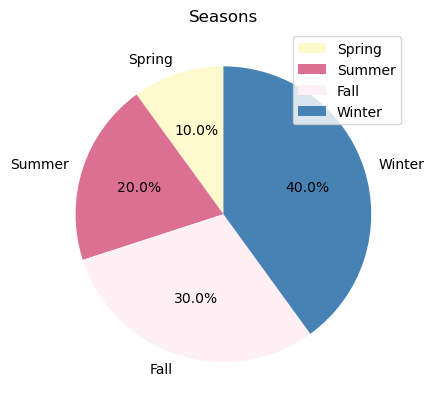

In [669]:

mylabels1 = ["Spring", "Summer", "Fall", "Winter"]
mycolors1= ["#FFFACD", "#DB7093", "#FFF0F5", "#4682B4"]
plt.pie(inp_new['season'].unique(),labels=mylabels1,colors=mycolors1,autopct='%1.1f%%', startangle=90)
plt.legend()
plt.title("Seasons")
plt.show()



###### Insights:
During winters we see a surge in Rentals

###### A.2) Month

Text(0.5, 1.0, 'Month')

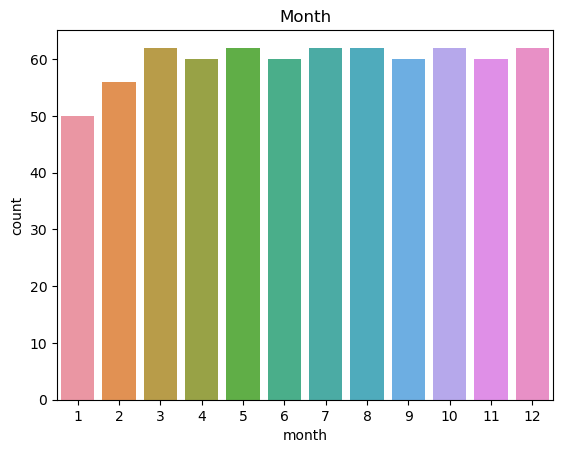

In [670]:
sns.countplot(inp_new['month'])
plt.title("Month")

###### Insights:
During the month of March we see a surge in Rentals

###### A.3) Weather

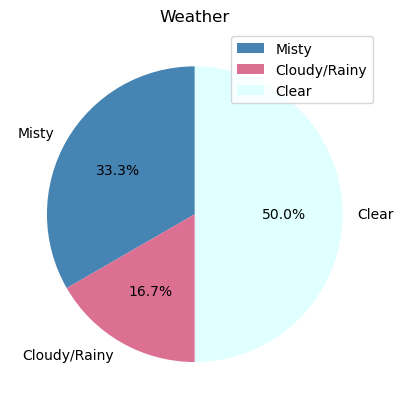

In [671]:
mylabels2=['Misty','Cloudy/Rainy','Clear']
mycolors2= ["#4684B4", "#DB7093", "#E0FFFF"]
plt.pie(inp_new['weathersit'].unique(),labels=mylabels2,colors=mycolors2,autopct='%1.1f%%', startangle=90)
plt.legend()
plt.title("Weather")
plt.show()

###### Insights:
During Clear weather we see a surge in Rentals

###### A.4) Holiday

Text(0.5, 1.0, 'Holiday')

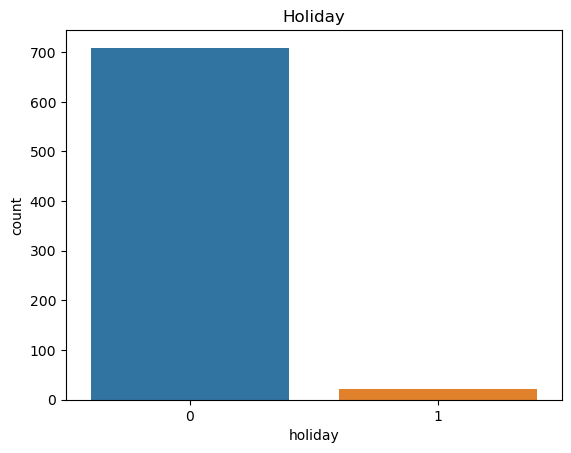

In [672]:
sns.countplot(input_data['holiday'])
plt.title("Holiday")

###### Insights:
During workingdays we see a surge in Rentals

###### A.5) Weekday

Text(0.5, 1.0, 'Weekday')

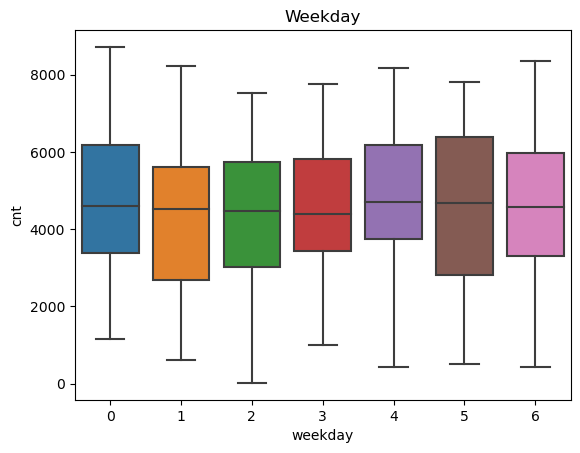

In [673]:
sns.boxplot(x=inp_new['weekday'],y=inp_new['cnt'])
plt.title("Weekday")

###### Insights:
During weekdays we do not see any surge in Rentals. The median values are more or less same, hence this indicator may not be considered for further analysis

###### A.6) Working Day

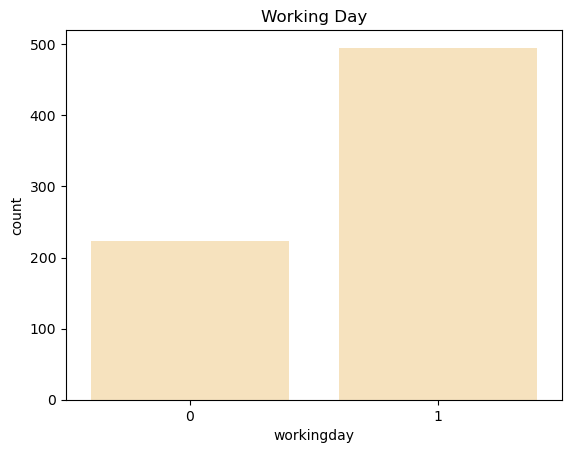

In [674]:
sns.countplot( inp_new['workingday'],color="#FFE4B5")
plt.title("Working Day")
plt.show()

###### Insights:
During working days we see a surge in Rentals

###### A.7) Year

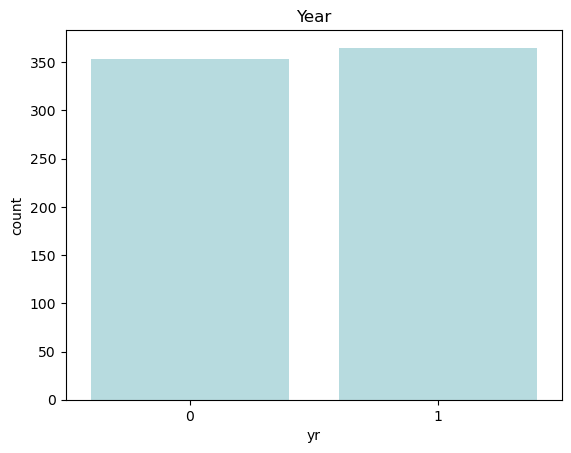

In [675]:
sns.countplot( inp_new['yr'],color="#B0E0E6")
plt.title("Year")
plt.show()

###### Insights:
We see a surge in Rentals in the year 2019

###### A.8) Date

Text(0.5, 1.0, 'Dates')

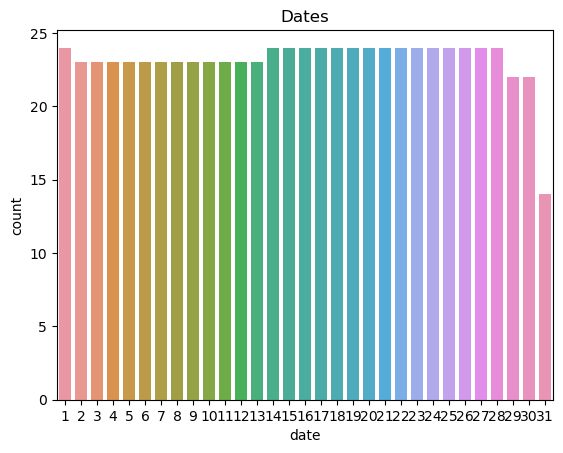

In [676]:
sns.countplot(inp_new['date'])
plt.title("Dates")

###### Insight
With change of date we do not see any surge in Rentals. The values are more or less same, hence this indicator may not be considered for further analysis.

##### B. Numerical Variables: 

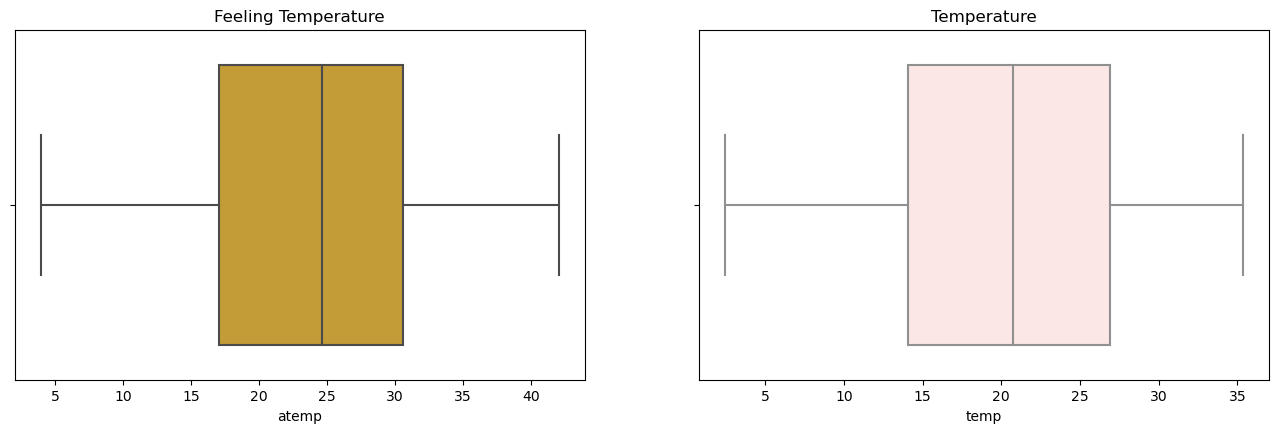

In [677]:
plt.figure(figsize=(25, 10))


plt.subplot(2,3,1)
sns.boxplot(x=inp_new['atemp'],color="#DAA520")
plt.title("Feeling Temperature")


plt.subplot(2,3,2)
sns.boxplot(x=inp_new['temp'],color="#FFE4E1")
plt.title("Temperature")

plt.show()

###### Insights:
Temperature and Feeling temperature are both correct geologically hence we can continue with both the variables

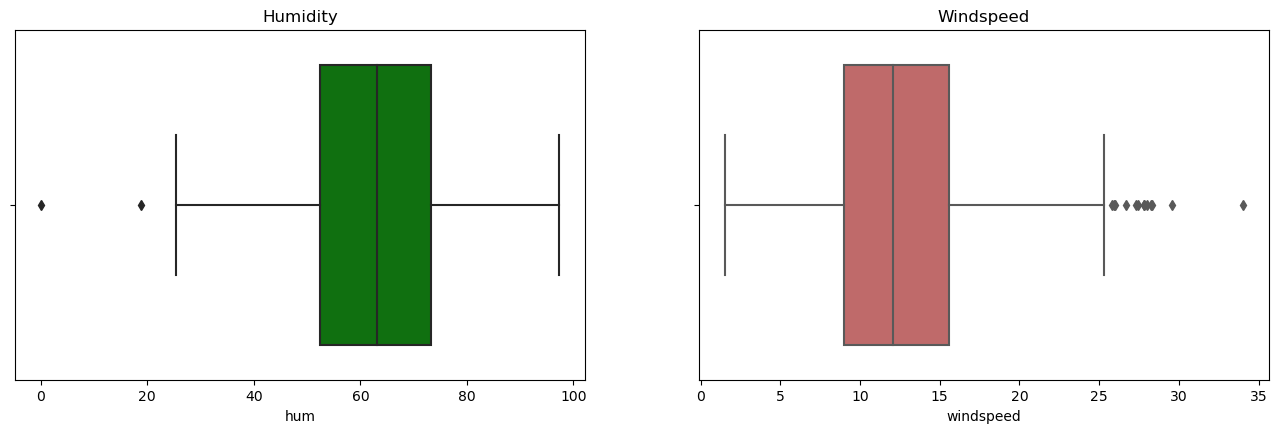

In [678]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x=inp_new['hum'],color="#008000")
plt.title("Humidity")

plt.subplot(2,3,2)
sns.boxplot(x=inp_new['windspeed'],color="#CD5C5C")
plt.title("Windspeed")


plt.show()

###### Insights:
1. Humidity has a zero value which is NOT possible unless in a controlled environment so this is a data discrepency which should be removed
2. The windspeed data is geoglogically correect within acceptable speed limits

##### Insights of Univariate Analysis:
1. Date column and Weakday column show no increase or decrese in rentals as such, hence they shall not be considered for further analysis.
2. We will also drop holiday column from further analysis because we saw that the rentals are consisitent throughout the weekdays but the holiday column shows a dip in rentals during holidays, thus we can say it is a kind of untrustworthy data as it contradicts two variables. 
3. We will perform a minor correction on humidity data removing it's zero values with mean or median values as per analysis

###### Correcting Humidity Column

In [679]:
print("Mean Humidity",inp_new.hum.mean())
print("Median Humidiity",inp_new.hum.median())

Mean Humidity 62.9246274373259
Median Humidiity 63.0833


Since Mean and median values are close by we can use any to replace the zero values 

In [680]:
mean_value = inp_new.hum.mean()
inp_new.at[int(inp_new[inp_new['hum'] == 0.0].hum.index.values), "hum"] = mean_value

##### Validiating the correction

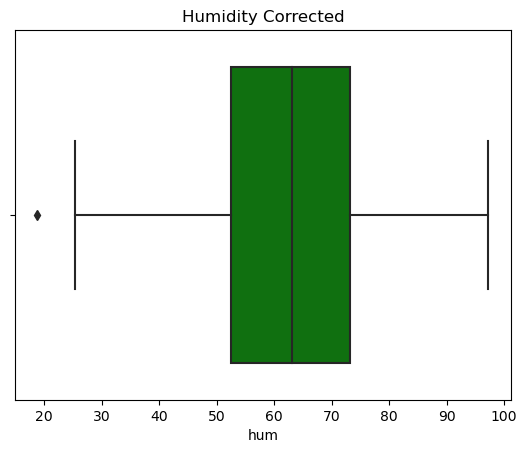

In [681]:
sns.boxplot(x=inp_new['hum'],color="#008000")
plt.title("Humidity Corrected")
plt.show()

Hence we see the zero valyue is now gone so we can further go ahead with the Bi Vwariate analysis

##### Step-5: Bivariate Analysis:

##### A) Categorical Variable V/s Target Variables

###### A.1) Season v/s Cnt

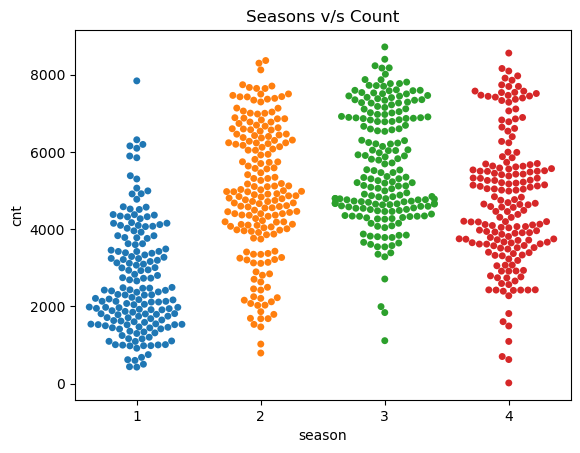

In [682]:
sns.swarmplot(x=inp_new['season'],y=inp_new['cnt'])
plt.title("Seasons v/s Count")
plt.show()

##### Insights:
 Fall season has maximum rentals. Spring season has minimum rentals.

###### A.2) Month v/s Cnt

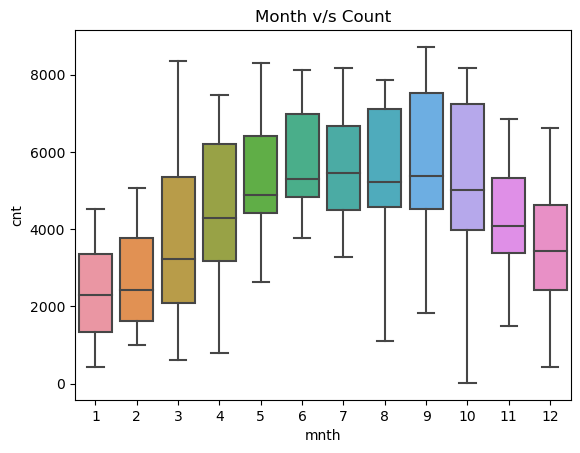

In [727]:
sns.boxplot(x=inp_new['mnth'],y=inp_new['cnt'])
plt.title("Month v/s Count")
plt.show()

##### Insights:
March has maximum Rentals, January has minimum Rentals.

###### A.2) Weather v/s Cnt

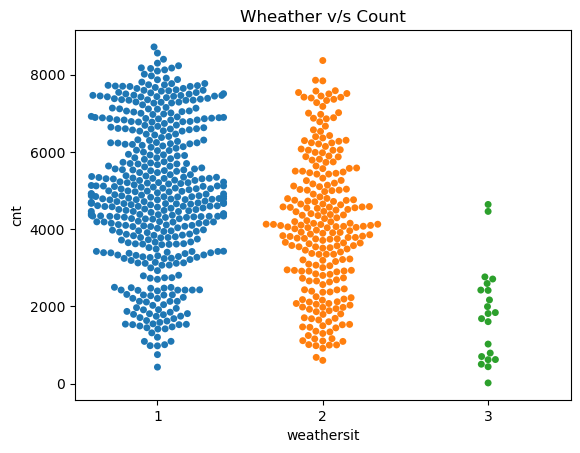

In [684]:
sns.swarmplot(x=inp_new['weathersit'],y=inp_new['cnt'])
plt.title("Wheather v/s Count")
plt.show()

##### Insights:
Clear weather has Maximum rentals

###### A.3) Workingday v/s Cnt

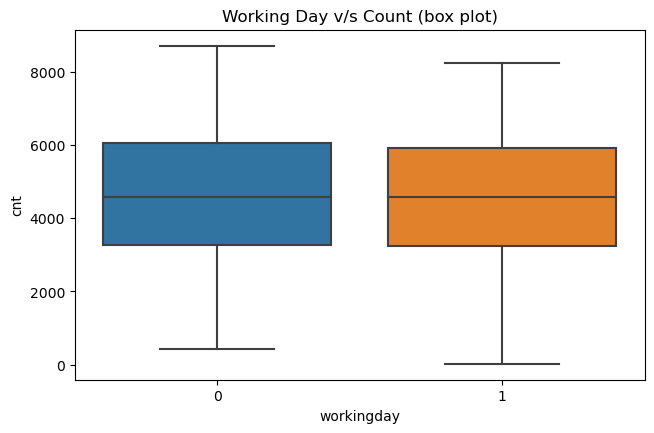

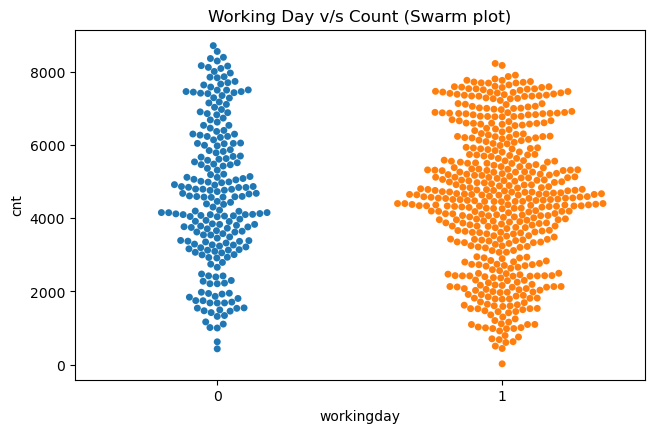

In [737]:
plt.figure(figsize=(25, 10))

plt.subplot(2,3,1)
sns.boxplot(x=inp_new['workingday'],y=inp_new['cnt'])
plt.title("Working Day v/s Count (box plot)")
plt.show()

plt.figure(figsize=(25, 10))
plt.subplot(2,3,2)
sns.swarmplot(x=inp_new['workingday'],y=inp_new['cnt'])
plt.title("Working Day v/s Count (Swarm plot)")
plt.show()


###### Insights:
Working day shows surge in Rentals

###### A.4) Year v/s Cnt

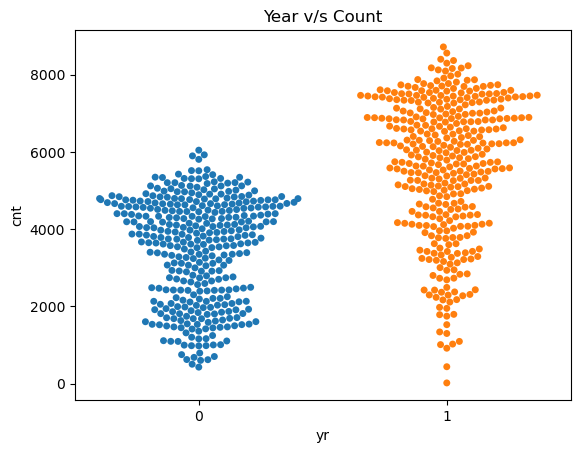

In [738]:
sns.swarmplot(x=inp_new['yr'],y=inp_new['cnt'])
plt.title("Year v/s Count")
plt.show()

##### Insights:
The Rentals have significantly increated in the year 2019

##### B) Numerical Variable V/s Target Variables

###### B.1) Temperature v/s Cnt

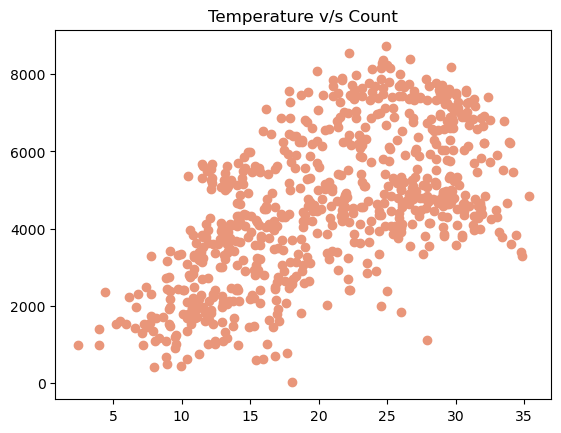

In [687]:
plt.scatter(x=inp_new['temp'],y=inp_new['cnt'],color=['DarkSalmon'])
plt.title("Temperature v/s Count")
plt.show()

##### Insights:
When tempertaure lies from 25 to 30 there is Maximum Rentals

######  B.2) Feeling Temperature v/s Cnt

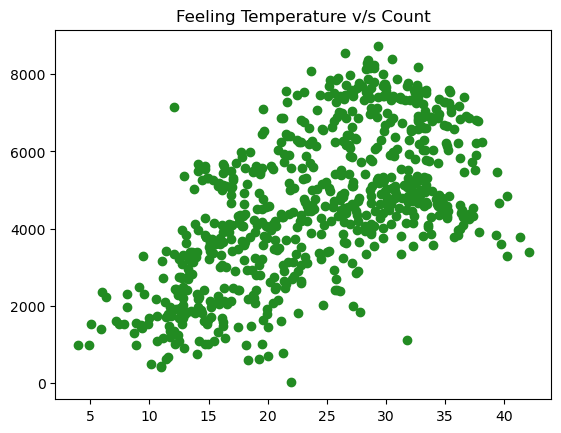

In [688]:
plt.scatter(x=inp_new['atemp'],y=inp_new['cnt'],color=['ForestGreen'])
plt.title("Feeling Temperature v/s Count")
plt.show()

##### Insights:
When  feeling tempertaure lies from 25 to 30 there is Maximum Rentals

###### B.3) Humidity v/s Cnt

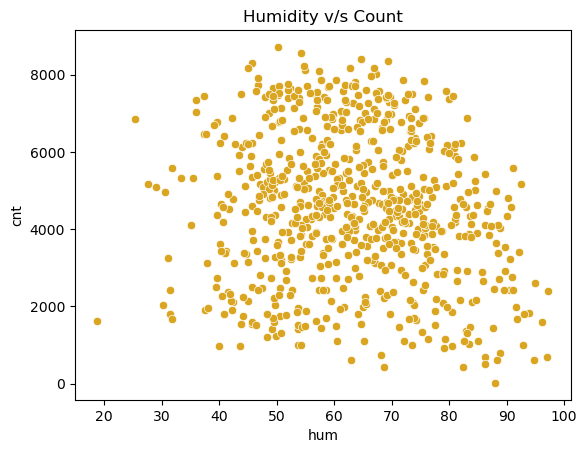

In [689]:
sns.scatterplot(x=inp_new['hum'],y=inp_new['cnt'],color=['GoldenRod'])
plt.title("Humidity v/s Count")
plt.show()

##### Insghits
When humidity is in range 40 to 80 rentals are maximum. 

###### B.4) Windspeed v/s Cnt

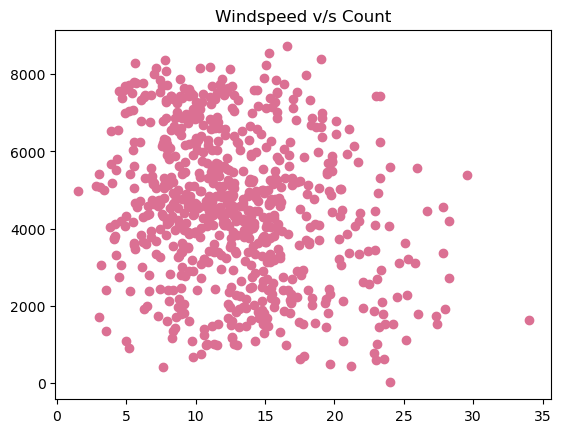

In [690]:
plt.scatter(x=inp_new['windspeed'],y=inp_new['cnt'],color=['PaleVioletRed'])
plt.title("Windspeed v/s Count")
plt.show()

##### Insghits:
As windspeed increases the rental decreases. 

##### Insights of Bivariate Analysis:
1. Temperature and Feeling temperature show positive coreelation with Target Variable
2. Windspeed shows negative Corelation with the Target Variable.
3. Humidity does not show any strng relationship with the Target Variable


##### Step-6: Multivariate Analysis:

In [691]:
# Inp_pair is the variable we define so that it stores values for pair plot analysis

inp_pair= inp_new[["hum","temp","atemp","windspeed","yr","season","month", "workingday","weathersit","cnt"]]


In [692]:
inp_pair.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         718 non-null    float64 
 1   temp        718 non-null    float64 
 2   atemp       718 non-null    float64 
 3   windspeed   718 non-null    float64 
 4   yr          718 non-null    category
 5   season      718 non-null    category
 6   month       718 non-null    category
 7   workingday  718 non-null    category
 8   weathersit  718 non-null    category
 9   cnt         718 non-null    int64   
dtypes: category(5), float64(4), int64(1)
memory usage: 54.3 KB


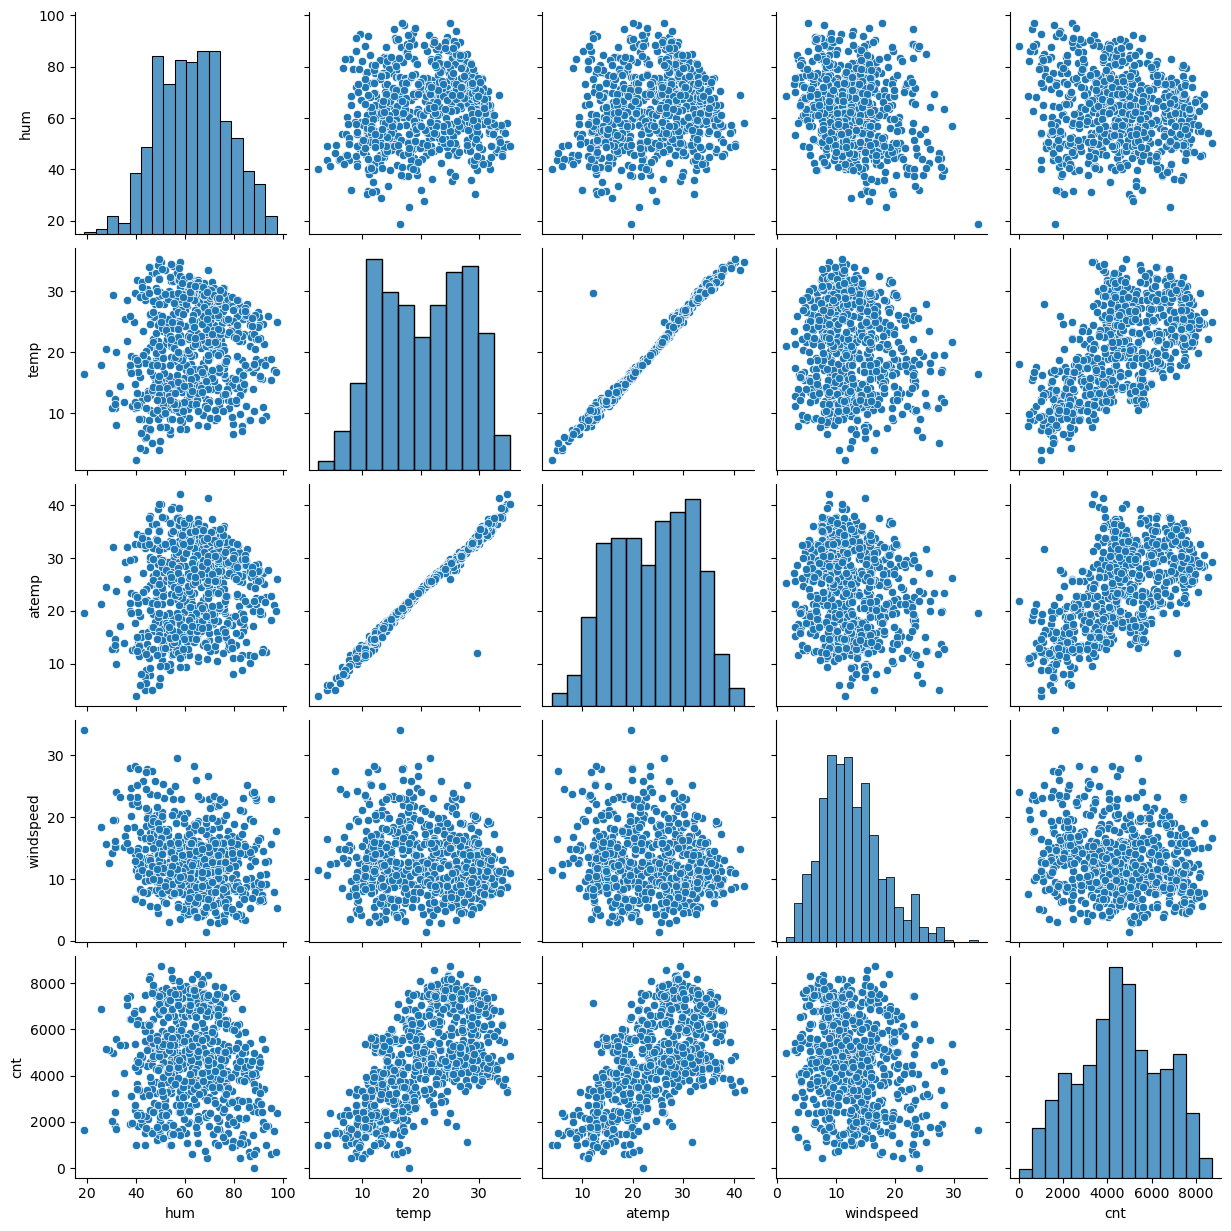

In [693]:
sns.pairplot(inp_pair)

##### Insights:

1. Storngly Positive Correlation:- temperature and feeling temperature, temperature and rentals (cnt), feeling temperature and rentals(cnt), humidity and feeling temperature, humidity and temperature

2. Strongly Negative Correlation:- windspeed and rentals(cnt), windspeed and feeling temperature,windspeed and temperature,

3. No Correlation: humidity and rentals (cnt)

4. Weakly Positive: temperature and humidity, feeling temperature and humidity,

5. Weakly Negative: Windspeed and Humidity

## 7. Data Transformation (One Hot Encoder Method)

Following Columns are Categorical Nominal Variables which needs to encoded using One Hot Encoder Method (i.e. Creating Dummy Variables):
1. Month
2. Season
3. Workingday
4. Weather Situation




Before creating dummy variables, we will have to check that the variable are 'category' data types.

In [694]:
# Check the datatypes before convertion
inp_pair.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         718 non-null    float64 
 1   temp        718 non-null    float64 
 2   atemp       718 non-null    float64 
 3   windspeed   718 non-null    float64 
 4   yr          718 non-null    category
 5   season      718 non-null    category
 6   month       718 non-null    category
 7   workingday  718 non-null    category
 8   weathersit  718 non-null    category
 9   cnt         718 non-null    int64   
dtypes: category(5), float64(4), int64(1)
memory usage: 54.3 KB


In [695]:
# inp_pair["yr"]=inp_pair["yr"].astype('int64')

 ##### The code below does 3 things:
 
 1. Create Dummy variable.
 
 2. Drop original variable for which the dummy was created.
 
 3. Drop first dummy variable for each set of dummies created.


In [696]:
inp_pair = pd.get_dummies(inp_pair)
inp_pair.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 729
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hum           718 non-null    float64
 1   temp          718 non-null    float64
 2   atemp         718 non-null    float64
 3   windspeed     718 non-null    float64
 4   cnt           718 non-null    int64  
 5   yr_0          718 non-null    uint8  
 6   yr_1          718 non-null    uint8  
 7   season_1      718 non-null    uint8  
 8   season_2      718 non-null    uint8  
 9   season_3      718 non-null    uint8  
 10  season_4      718 non-null    uint8  
 11  month_1       718 non-null    uint8  
 12  month_2       718 non-null    uint8  
 13  month_3       718 non-null    uint8  
 14  month_4       718 non-null    uint8  
 15  month_5       718 non-null    uint8  
 16  month_6       718 non-null    uint8  
 17  month_7       718 non-null    uint8  
 18  month_8       718 non-null    

In [697]:
inp_pair.shape


(718, 28)

## 8.Splitting the Data

1. Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio).

2. We will use train_test_split method from sklearn package for this.

In [698]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(inp_pair, train_size = 0.70, test_size = 0.30, random_state = 333)

In [699]:
df_test.shape

(216, 28)

## 9. Data Transformation (Normalising)

Following Columns are Numerical which needs to be Normalised:

1. Temperature

2. Humidity

3. Windspeed

4. Feeling Temperature

In [700]:
numerical_variables = ['atemp', 'temp', 'hum', 'windspeed']

In [701]:
scaler = MinMaxScaler()

In [702]:
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])
df_train.head(10)

,hum,temp,atemp,windspeed,cnt,yr_0,yr_1,season_1,season_2,season_3,...,month_8,month_9,month_10,month_11,month_12,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
563,0.497337,0.914852,0.874889,0.237182,5713,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
253,0.671991,0.740406,0.695906,0.191028,5046,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
396,0.408946,0.510926,0.508605,0.343610,4579,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
295,0.707135,0.451738,0.450580,0.158989,4381,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
483,0.510116,0.497426,0.487055,0.194850,6304,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
582,0.595847,0.863973,0.828504,0.220508,7013,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
79,0.702203,0.462664,0.434043,0.549180,2077,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
44,0.240148,0.443431,0.419099,0.815378,1913,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
26,0.638445,0.169300,0.184596,0.188519,431,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
651,0.578275,0.576343,0.563297,0.528212,6639,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0


## 10. Manual Analysis of Variable (using Correlaion-Co-efficient)

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

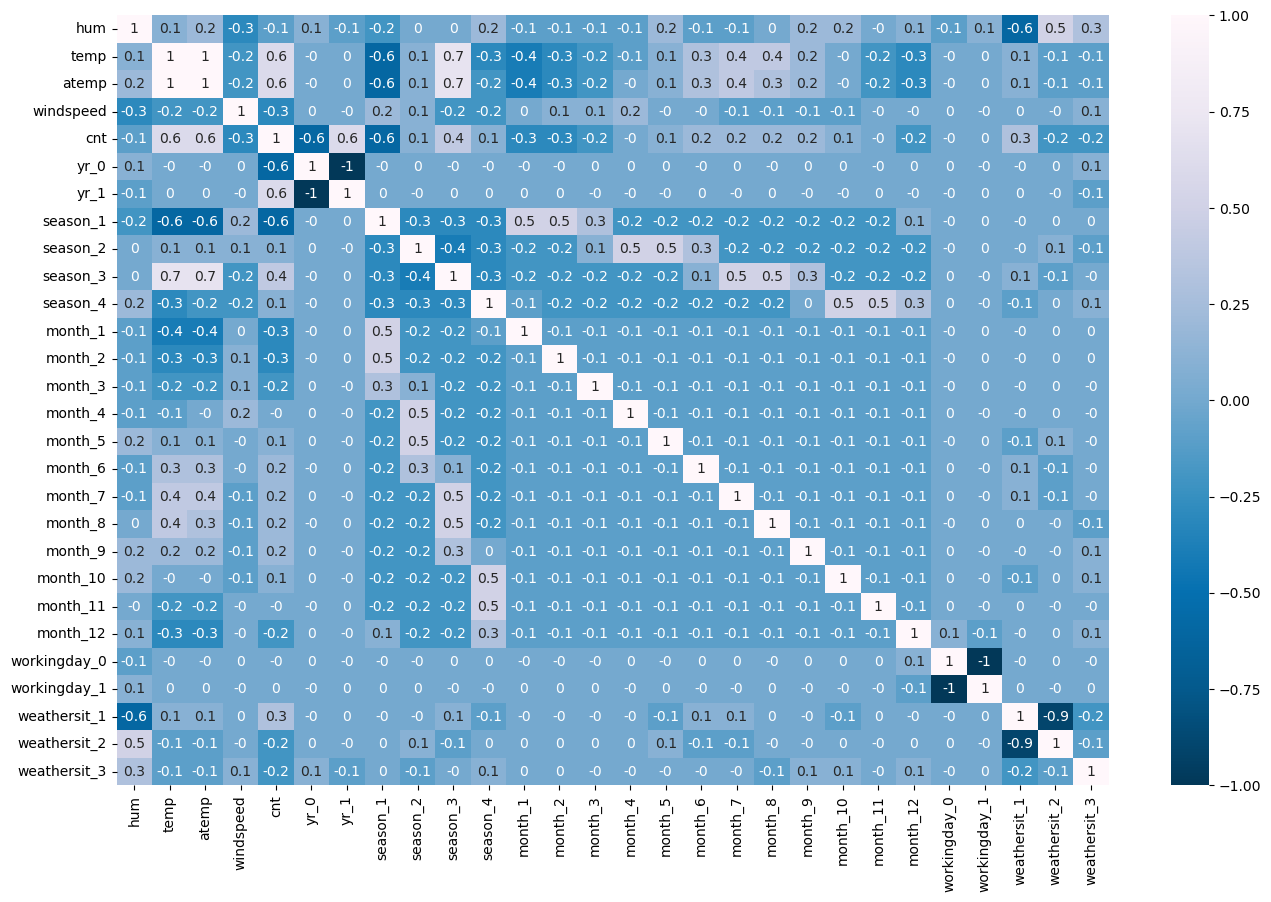

In [703]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='PuBu_r')
plt.show()

1. 0.4 − 0.59 is a moderate correlation. 0.6 − 0.79 is a strong correlation. 0.8 − 1 is a very strong correlation. There are two main measurements of correlation analysis, Pearson's r and Spearman's ρ.

2. From the above Corelation Coefficient Heatmap, we see that no variable is highly correlated with another variable in any way. So, we can further proceed and check Multi-Collinearity while creating models itself.

## 11. Iterative Modelling Process

#### A. Defining Target & Feature Variables 

In [704]:
# Fixing Trained Target Variable

y_train = df_train.pop('cnt')

# Fixing Trained Feature(s) Variable

X_train = df_train

##### B.Creating a generalised function for evaluating Variance Inflation Factor

In [705]:
def fetch_vif_inp(local_df):
    vif_inp = pd.DataFrame()
    vif_inp['Features'] = local_df.columns
    vif_inp['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_inp['VIF'] = round(vif_inp['VIF'], 2)
    vif_inp = vif_inp.sort_values(by='VIF', ascending=False)
    vif_inp = vif_inp.reset_index(drop=True)
    return vif_inp

###### Currently, we have 28 Predictors to Predict our outcome. Analysing them can be very hectic.

To simplify this process, we will use RFE (Recursive Feature Elimination) method. 

It provide us with set of variables ranked in an order of importance (of impacting outcome).

We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.

###### C. RFE (Recursive Feature Elimination) Application


In [706]:
lmr = LinearRegression()
lmr.fit(X_train, y_train)
rfe = RFE(lmr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [707]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
13,month_4,True,1
19,month_10,True,1
18,month_9,True,1
17,month_8,True,1
4,yr_0,True,1
5,yr_1,True,1
6,season_1,True,1
7,season_2,True,1
8,season_3,True,1
9,season_4,True,1


RFE method has successfully evaluated top 15 predictors which will impact our outcome.

But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

###### D. Model Building 

###### D1. Model-1

In [708]:
col_m1 = X_train.columns[rfe.support_]
X_train_rfe = X_train[col_m1]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.21e-139
Time:                        12:53:56   Log-Likelihood:                -4148.8
No. Observations:                 502   AIC:                             8326.
Df Residuals:                     488   BIC:                             8385.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1840.2907     82.856     22.211      0.000    1677.493    2003.088
yr_0        -182.4219     60.933     -2.994      0.003    -302.145     -62.699
yr_1        2022.7126     57.963     34.896      0.000    1908.824    2136.601
season_1    -609.1415    130.924     -4.653      0.000    -866.385    -351.898
season_2     266.0272    178.749      1.488      0.137     -85.185     617.239
season_3     690.0171    181.484      3.802      0.000     333.431    1046.603
season_4    1493.3880    129.214     11.557      0.000    1239.504    1747.272
month_2      445.4271    203.131      2.193      0.029      46.307     844.547
month_3     1130.2477    209.258      5.401      0.000     719.090    1541.405
month_4     1611.6828    310.116      5.197      0.000    1002.356    2221.010
month_5     2389.4943    308.524      7.745      0.000    1783.296    2995.693
month_6     2509.5027    282.919      8.870      0.000    1953.612    3065.393
month_7     2178.4387    311.803      6.987      0.000    1565.797    2791.080
month_8     2239.7614    305.162      7.340      0.000    1640.167    2839.356
month_9     2229.4332    254.211      8.770      0.000    1729.949    2728.917
month_10    1001.7712    186.099      5.383      0.000     636.118    1367.425
==============================================================================
Omnibus:                      137.401   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.649
Skew:                          -1.214   Prob(JB):                    4.31e-110
Kurtosis:                       7.264   Cond. No.                     1.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [709]:
fetch_vif_inp(X_train_rfe)

,Features,VIF
0,yr_0,inf
1,yr_1,inf
2,season_1,inf
3,season_2,inf
4,season_3,inf
5,season_4,inf
6,month_8,4.60
7,month_5,4.20
8,month_4,4.07
9,month_7,4.02


In the above model we see that P-Value of "Season_2" (Summer) feature is more than 0.05, which make its co-efficient insignificant.
So, we will proceed ahead with dropping this feature and designing model again.

##### D2. Model-2

In [710]:
col_m1 = col_m1.drop(['season_2'])
X_train_rfe = X_train[col_m1]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.21e-139
Time:                        12:53:56   Log-Likelihood:                -4148.8
No. Observations:                 502   AIC:                             8326.
Df Residuals:                     488   BIC:                             8385.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2017.6422    181.973     11.088      0.000    1660.095    2375.189
yr_0         -93.7462    101.475     -0.924      0.356    -293.128     105.636
yr_1        2111.3883     99.498     21.220      0.000    1915.890    2306.886
season_1    -875.1687    260.539     -3.359      0.001   -1387.086    -363.251
season_3     423.9900    250.981      1.689      0.092     -69.146     917.126
season_4    1227.3608    278.539      4.406      0.000     680.077    1774.644
month_2      445.4271    203.131      2.193      0.029      46.307     844.547
month_3     1130.2477    209.258      5.401      0.000     719.090    1541.405
month_4     1611.6828    310.116      5.197      0.000    1002.356    2221.010
month_5     2389.4943    308.524      7.745      0.000    1783.296    2995.693
month_6     2509.5027    282.919      8.870      0.000    1953.612    3065.393
month_7     2178.4387    311.803      6.987      0.000    1565.797    2791.080
month_8     2239.7614    305.162      7.340      0.000    1640.167    2839.356
month_9     2229.4332    254.211      8.770      0.000    1729.949    2728.917
month_10    1001.7712    186.099      5.383      0.000     636.118    1367.425
==============================================================================
Omnibus:                      137.401   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.649
Skew:                          -1.214   Prob(JB):                    4.31e-110
Kurtosis:                       7.264   Cond. No.                     1.11e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [711]:
fetch_vif_inp(X_train_rfe)

,Features,VIF
0,yr_0,20.74
1,season_4,7.84
2,season_3,6.97
3,season_1,6.58
4,month_8,4.61
5,month_5,4.21
6,month_4,4.07
7,month_7,4.03
8,month_6,3.61
9,month_9,2.80


In the above model we see that P-Value of "yr_0" (2018) feature is more than 0.05, which make its co-efficient insignificant. So, we will proceed ahead with dropping this feature and designing model again.

##### D3. Model-3


In [712]:
col_m1 = col_m1.drop(['yr_0'])
X_train_rfe = X_train[col_m1]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.21e-139
Time:                        12:53:56   Log-Likelihood:                -4148.8
No. Observations:                 502   AIC:                             8326.
Df Residuals:                     488   BIC:                             8385.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1923.8960    277.349      6.937      0.000    1378.950    2468.842
yr_1        2205.1345     85.323     25.844      0.000    2037.488    2372.781
season_1    -875.1687    260.539     -3.359      0.001   -1387.086    -363.251
season_3     423.9900    250.981      1.689      0.092     -69.146     917.126
season_4    1227.3608    278.539      4.406      0.000     680.077    1774.644
month_2      445.4271    203.131      2.193      0.029      46.307     844.547
month_3     1130.2477    209.258      5.401      0.000     719.090    1541.405
month_4     1611.6828    310.116      5.197      0.000    1002.356    2221.010
month_5     2389.4943    308.524      7.745      0.000    1783.296    2995.693
month_6     2509.5027    282.919      8.870      0.000    1953.612    3065.393
month_7     2178.4387    311.803      6.987      0.000    1565.797    2791.080
month_8     2239.7614    305.162      7.340      0.000    1640.167    2839.356
month_9     2229.4332    254.211      8.770      0.000    1729.949    2728.917
month_10    1001.7712    186.099      5.383      0.000     636.118    1367.425
==============================================================================
Omnibus:                      137.401   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.649
Skew:                          -1.214   Prob(JB):                    4.31e-110
Kurtosis:                       7.264   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [713]:
fetch_vif_inp(X_train_rfe)

,Features,VIF
0,season_3,7.73
1,month_8,3.76
2,month_7,3.26
3,month_9,2.39
4,season_1,2.25
5,season_4,1.92
6,month_2,1.72
7,month_10,1.59
8,month_6,1.41
9,month_3,1.35


From the Model Summary Report we can say that all the p-values of respective features are well under control


###### Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10.

We see that all the features under VIF table are well under control, so we can fix the features available for our model.


## 12. Proof for Linear Regrssion Assumptions

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions:

1. Linear relationship
2. Multivariate normality
3. No or little multicollinearity
4. No auto-correlation
5. Homoscedasticity

###### A. Assumption of Normally Distributed Error Terms
After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

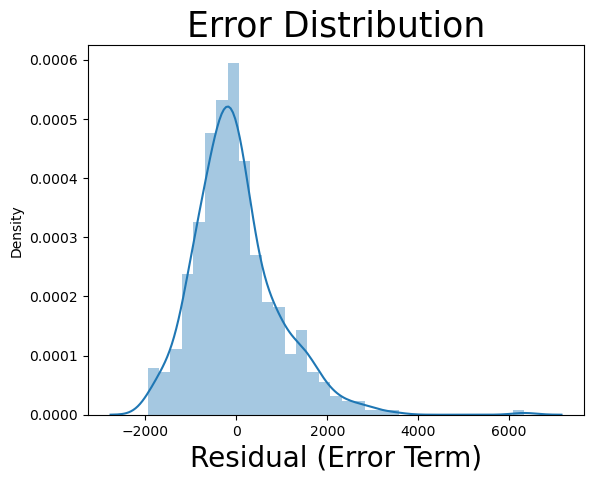

In [714]:
y_train_pred = lr_model1.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0,therefore our model has handled the assumption of Error Normal Distribution properly.

##### B. Assumption of Error Terms Being Independent

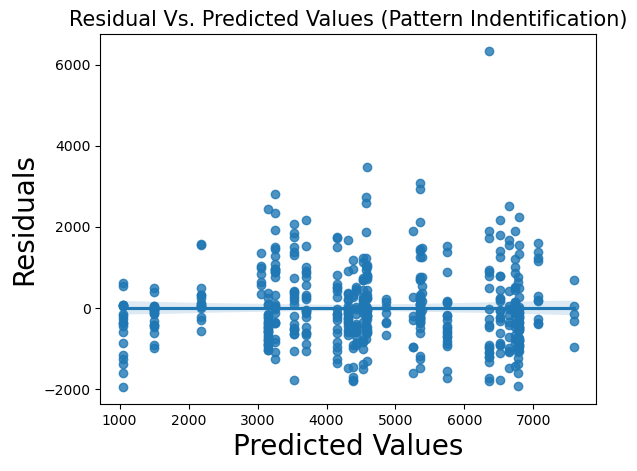

In [715]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 15})
plt.xlabel('Predicted Values', fontdict={'fontsize': 20})
plt.ylabel('Residuals', fontdict={'fontsize': 20})
plt.show()


From the above graph, we see that there is some relation between Residual & Predicted Value. This is what we expect from our model to have no specific pattern.

###### C. Homoscedasticity

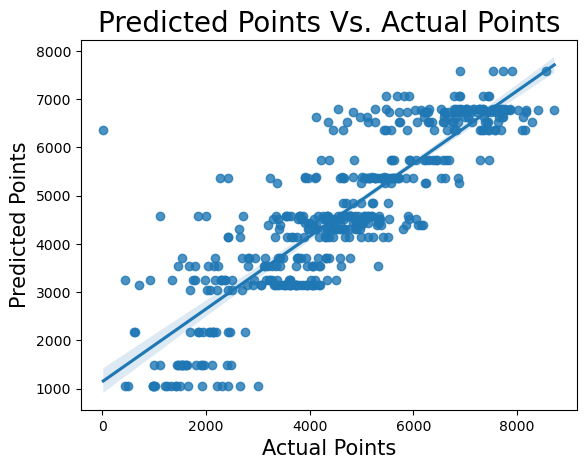

In [716]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

This graph prooves homoscedasticity of model.

##### D. Multicorrelation

This asumption is already taken care of while building model by calculating VIF of evry predictor. Following is the final VIF value of all the predictors used in the model.

In [717]:
fetch_vif_inp(X_train_rfe)

,Features,VIF
0,season_3,7.73
1,month_8,3.76
2,month_7,3.26
3,month_9,2.39
4,season_1,2.25
5,season_4,1.92
6,month_2,1.72
7,month_10,1.59
8,month_6,1.41
9,month_3,1.35


##### Insight
From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

##  13. Predicting on Test Data

In [718]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.head(10)

,hum,temp,atemp,windspeed,cnt,yr_0,yr_1,season_1,season_2,season_3,...,month_8,month_9,month_10,month_11,month_12,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
145,0.625665,0.808938,0.755577,0.365411,4677,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
350,0.476570,0.248216,0.223544,0.455140,2739,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
172,0.664004,0.840090,0.806955,0.308966,4507,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
698,0.589988,0.298058,0.321330,0.074379,5668,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
677,0.451011,0.376975,0.362738,0.396161,5992,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
77,0.244409,0.515079,0.508588,0.712834,3117,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
17,0.861022,0.196298,0.201179,0.256423,683,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
169,0.611821,0.797517,0.743971,0.164117,4744,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
148,0.806176,0.758058,0.704203,0.394883,4788,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
411,0.722045,0.320903,0.329593,0.142316,3005,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0


###### A. Fixing Test Target Variable

Since we didn't normalise Target variable we don't need to fix it

###### B.Fixing Test Feature(s) Variable

In [719]:
X_test = df_test

##### C.Filtering Test Input (& Reserving Required Features Only)

In [720]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

###### D.Predicting Test Data Using Developed Model

In [721]:
y_test_pred = lr_model1.predict(X_test_new)

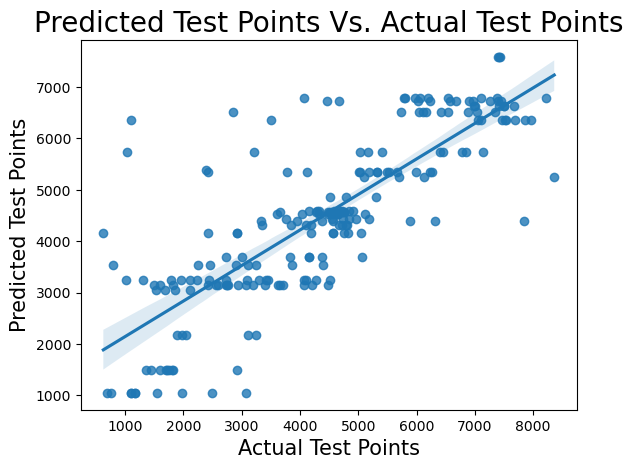

In [722]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

## 14.Final Model Interpretation

##### A. Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

#### B. model coefficient values

        const	          2132.3040	

        yr_1	          2208.7724	

        season_1	     -1050.1110	

        season_4	      992.6099	

        month_2	          410.0515	

        month_3	          1036.7355	

        month_4	          1401.5424	

        month_5	          2179.3500	

        month_6	          2459.3285	

        month_7	          2392.2460	

        month_8	          2453.3789	

        month_9	          2390.4276	

        month_10	       1026.2951

###### Insights
From the model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS.


###### C.F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 123.8
Prob (F-statistic): 1.16e-139

The F-Statistics value is greater than 1 and the p-value of '~0.0000' states that the overall model is significant.

## 14. Generating R-Square

##### A. R^2 Value for TEST

In [723]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)


0.652802444004249

Hence, the R2 value for our model is 0.6523742861600172

##### B.Adjusted R^2 Value for TEST

In [724]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
r2 =r2_score(y_test, y_test_pred)
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6008156441760082

##### C. R^2 Value for TRAIN

In [725]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.7537975609585844

##### D.Adjusted R^2 Value for TRAIN

In [726]:
# nn is number of rows in X

nn = X_train.shape[0]


# Number of features (predictors, p) is the shape along axis 1
pp = X_train.shape[1]

# We find the Adjusted R-squared using the formula
r_2 =r2_score(y_train, y_train_pred)
adjusted_r_2 = 1-(1-r_2)*(nn-1)/(nn-pp-1)
adjusted_r_2

0.7397733713929342

## 15. Final Result 

1. Train R^2 :0.752
2. Train Adjusted R^2 :0.738
3. Test R^2 :0.652
4. Test Adjusted R^2 :0.602
5. This seems to be a really good model that can very well 'Generalize' various datasets.

## 16. Final Report

As per our final Model, the top 3 predictor variables that influences the bike booking are:

1. yr_1  
2. season_1 
3. season_4

These have very high coefficient Values and can be used to increase rentals.

The next best features that can be considered are:

1. month_2                
2. month_3               
3. month_4                  

In the month of feb march and april we will see a hike in the bike rentals.
